In [136]:

import numpy as np
from skimage.io import imread, imsave
from skimage.morphology import h_minima, watershed, local_minima
from utils.display_utils import image_grid, image_gray, rebuild
import nibabel as nib

In [137]:
neur = imread('data/top_23.tif')
neur = np.rollaxis(neur, 0,3)
neur.shape

(1024, 1024, 23)

In [134]:
# image_gray(neur[:,:,0])

In [73]:
arr = np.eye(4)*[1,1,5,1]
cube = neur
arr_im = nib.Nifti1Image(cube, arr)
file_string = 'data/neuron_23.nii.gz'
nib.save(arr_im, file_string)

In [129]:
'''
start here with  h_minima
invert the map when passing into min or watershed
'''
h_min, h_n = nd.label(h_minima(-neur,.05))

In [130]:
water_s = watershed(-neur, h_min)

In [131]:
np.unique(water_s)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

<Figure size 432x288 with 0 Axes>

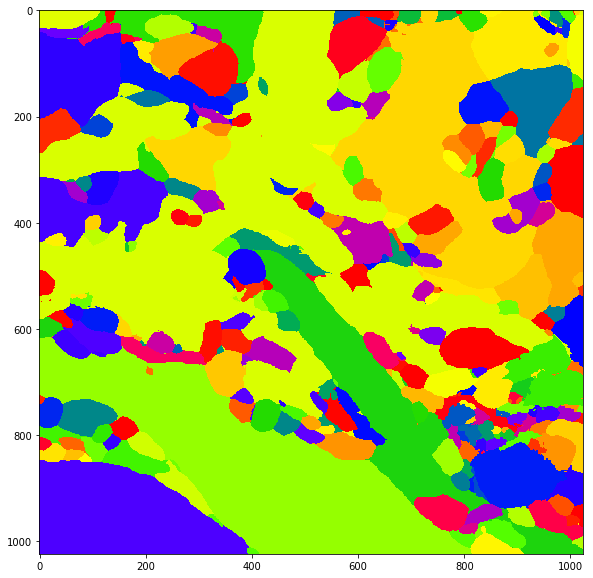

In [132]:
image_gray(water_s[:,:,15],10,'prism')

In [133]:
arr = np.eye(4)*[1,1,5,1]
cube = water_s
arr_im = nib.Nifti1Image(cube, arr)
file_string = 'data/neuron_23_h_.nii.gz'
nib.save(arr_im, file_string)

<Figure size 432x288 with 0 Axes>

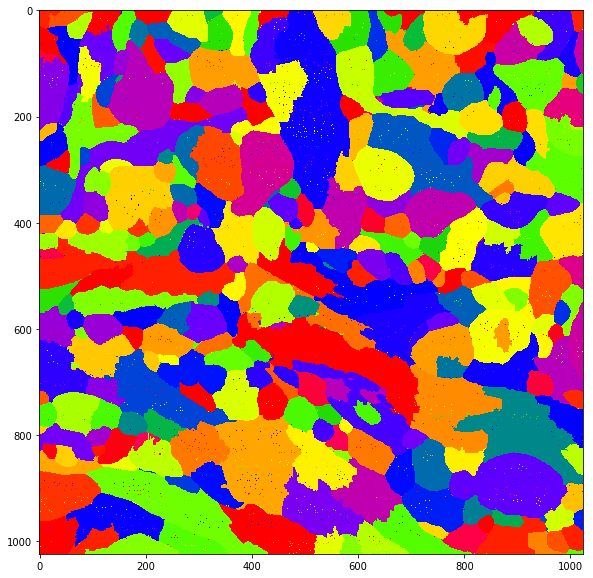

In [102]:
'''
local minima way over segments
'''
h_min, h_n = nd.label(local_minima(neur,.12))
wat = watershed(-neur, h_min)
image_gray(wat[:,:,0],10,'prism')

In [105]:
arr = np.eye(4)*[1,1,5,1]
cube = wat
arr_im = nib.Nifti1Image(cube, arr)
file_string = 'data/neuron_23_h_min.nii.gz'
nib.save(arr_im, file_string)